# Chapter 2: Probability theory

[Link to outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.pmjunkwyx42x)

In this lesson:
- introduction to probability theory
- examples of random processes
- examples of probability models (uniform and normal)
- properties of random samples of size n

$$ \, 
$$

$$ \, 
$$

$$ \, 
$$

$$ \, 
$$


Concept map:
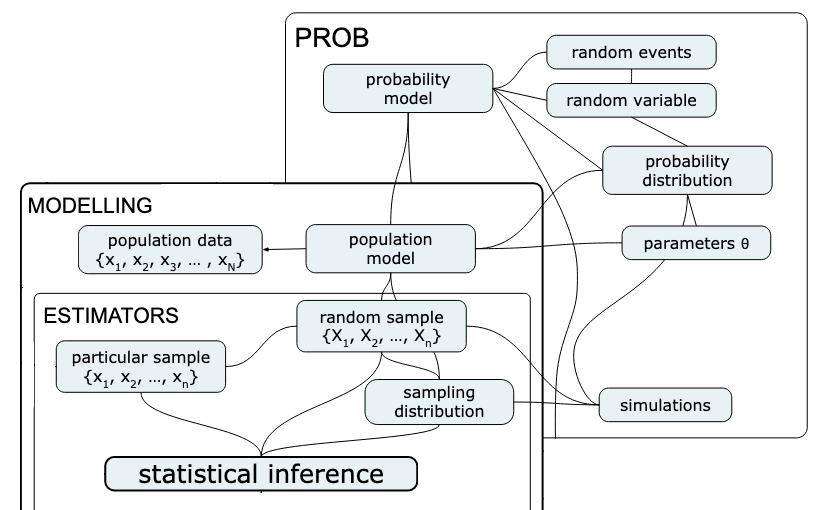

## Why probability theory?

- definition: **probability theory is a language for describing uncertainty, variability, and randomness**

- Originally the study of "randomness" and "expectations" started to quantify random events in gambling:
  - example 1: `flip_coin` (see below)
  - example 2: `roll_die` (see below)


- Later extended to as a general purpose tool to model any process that contains uncertainty:
  - random variables = described by probability distribution (CDF, pmf/pdf) modelled as a math function with parameters $\theta$
  - noise = can be modelled as a random variable
  - sampling = variations due to random selection of a subset from the population
  - beliefs = can be described as probability distributions


- Probability theory is an essential too for all of statistics

- Probability theory is also a foundational subject that used in physics, machine learning, biology, optimization, algorithms, etc. (side note: in terms of usefulness, I'd say probability theory is up there with linear algebra—you need to know this shit!)



#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns

# set random seed for repeatability
np.random.seed(42)

# notebooks figs setup
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,5)})

# silence annoying warnings
import warnings; warnings.filterwarnings('ignore')

## Random process examples using Python

Let's look at some simple examples of two random events: a coin flip and a die roll.

In [2]:
import random   # module for random number generation

random.random() # random number between 0 (inclusive) and 1 (non-inclusive)

0.3129810344661835

In [3]:
### Example 1: coin flip

def flip_coin():
    r = random.random()  # a number in the range [0,1)
    if r < 0.5:
        return "heads"
    else:
        return "tails"

flip_coin()

'heads'

In [4]:
# Let's see if the coin is fair -- what happens after many flips?
flips = [flip_coin() for _ in range(0, 10000)]
heads = [flip for flip in flips if flip == "heads"]

len(heads)/len(flips)

0.4974

In [5]:
### Example 2: roll of a fair six-sided die

def roll_die():
    r = random.random()*6  # a number in the range [0,6)
    rint = int(r)          # convert to integer in {0,1,2,3,4,5}
    value = rint + 1       # convert to integer in {1,2,3,4,5,6}
    return value

roll_die()

3

1     9813
2    10014
3    10071
4    10046
5    10072
6     9984
dtype: int64


<AxesSubplot:>

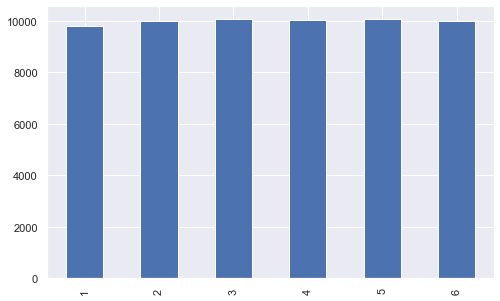

In [6]:
rolls = [roll_die() for _ in range(0, 60000)]
ds = pd.Series(rolls)
print(ds.value_counts().sort_index())
ds.value_counts().sort_index().plot(kind="bar")


### Why do we need probability theory in statistics?

Probability theory provides us with some essential tools needed for statistics:
  - modelling: describe a population as a probability distribution
  - sampling distributions: distributions obtained for random samples from a population
  - basically, there is "noise" and "uncertainty" in all the things, but if we can model
    the randomness, then it's very helpful...

Additionally, artificially introduced randomness is the basis for two of the most important statistics "kung fu" techniques:

- **random selection** = if you collect a sample of size n randomly selected from a population, then compute statistics from the sample, you can then make inferences about the whole population.
- **random assignment** = create two roughly equivalent groups by randomly assigning participants into group A or group B. This random split is the basis for a statistical experiment that compares an intervention group and a control group. Given the participants were randomly assigned to the two groups, we can hope they are roughly equally distributed on all dimensions (similar distribution of all confounding variables), so that any differences observed between groups can be attributed to the intervention. Calculating the difference statistic intervention-control give an estimate of the effect size of this intervention.

In the context of Amy's analysis of employee data:
- the split of new employees into NS and S groups is an example of random assignment
- the sample of 61 employees we're analyzing considered as representative of future employees


## Probability models

In probability theory, we model data as instances of a **random variable** $X$ described by a **probability distribution** $p_X$ (a math function) with particular parameters (usually denoted with Greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function). Math models allow us the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for an entire population (census)
- sample data from a population
- synthetic data obtained by resampling
  - bootstrap estimation for any distribution
  - permutation test for no-difference-between-groups hypotheses

## Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $U(0,1)$ is described by the following probability density function:
$$ \Large
  p_X(x)=\begin{cases}
  1 & \mathrm{for}\ 0 \le x \le 1, \\
  0 & \mathrm{for}\ x<0\ \mathrm{or}\ x>1
  \end{cases}
$$
where $X$ is the name of the random variable and $x$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $X=x$.
For a uniform distribution $U(0,1)$, each $x$ between 0 and 1 is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [7]:
from scipy.stats.distributions import uniform

# create a uniform random variable U(0,1)
X = uniform(0, 1)
X

In [8]:
# draw 10 random samples from X
X.rvs(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

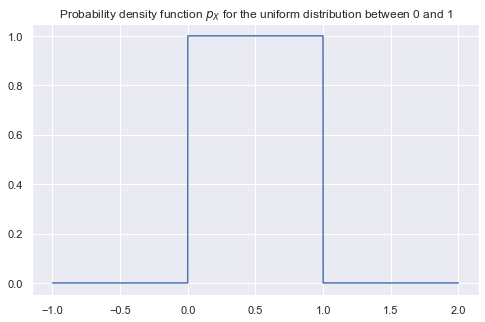

In [9]:
# plot the probability density function (pdf) of the random variable X
x = np.linspace(-1, 2, 10000)
pX = X.pdf(x)
_ = sns.lineplot(x, pX).set_title("Probability density function $p_X$ for the uniform distribution between 0 and 1")

## Normal probability distribution

A random variable $X$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is described by the probability density function:
$$ \Large
    p_X(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$
where the mean $\mu$ and standard deviation $\sigma$ are called the parmeters of the distribution. The math notation $\mathcal{N}(\mu, \sigma^2)$ is used to describe this probability distribution.

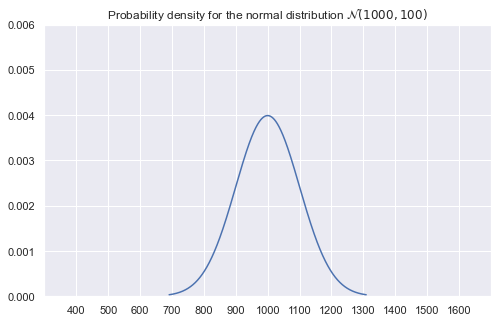

In [10]:
from scipy.stats.distributions import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rv = norm(mean, std)

# 3. plot it's probability density function (pdf)
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 10000)
y = rv.pdf(x)
ax = sns.lineplot(x, y)
title = 'Probability density for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
_ = ax.set_ylim(0, 0.006)

### Example probability calculation

What is the probability of observing a value between 800 and 900.

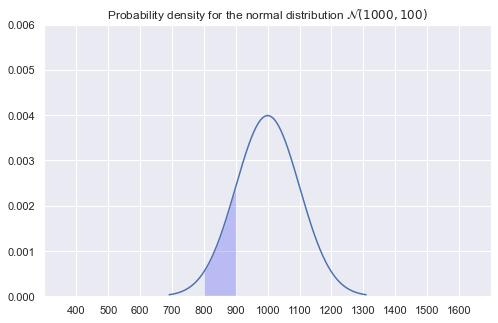

In [11]:
# highlight the area under the curve 
mask = (x > 800) & (x < 900)
_ = ax.fill_between(x[mask], y1=y[mask], alpha=0.2, facecolor='blue')
ax.figure

In [12]:
from scipy import integrate

# Pr(800 < X < 900) = integral of f_X between 800 and 900
integrate.quad(rv.pdf, 800, 900)[0]

0.13590512198327784

### Cumulative density function (CDF)

The cumulative distribution is the integral (summation) of the probability density function:
$$\large
   F_X(x) = \textrm{Pr}(X \leq x) = \int_{-\infty}^x f_X(t) \, dt
$$


In [13]:
# Pr(800 < X < 900) = F(900) - F(800)
rv.cdf(900) - rv.cdf(800)

0.13590512198327787

### The inverse-CDF function

In [14]:
rv.ppf(0.6)

1025.33471031358

In [15]:
rv.cdf(1025.33471031358)

0.6000000000000001

### Bulk of the distribution

How much of the total probability "weight" lies within two standard deviations of the mean?

$$
\textrm{Pr}(\mu - 2\sigma \leq X \leq \mu + 2\sigma) \ = \ ?
$$

0.9564320296354867

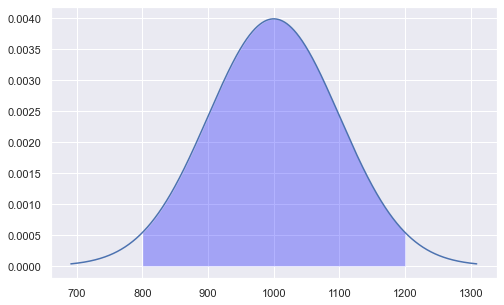

In [16]:
mu = rv.mean()    # mean of the random variable
sigma = rv.std()  # standard deviaiton of the random variable
n = 2             # number of standard deviations around the mean

# highlight the selected area around the mean
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 10000)
y = rv.pdf(x)
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]

# values of x in the interval  𝜇 ± 2𝜎 = [𝜇-2𝜎, 𝜇+2𝜎]
mask = (x > mu-n*sigma) & (x < mu+n*sigma)
ax.fill_between(x[mask], y1=y[mask], alpha=0.3, facecolor='blue')


# calculate the probability of Pr{𝜇-2𝜎 < x < 𝜇+2𝜎}
sum(y[mask])/sum(y)

### Tails of the distribution

We're often interested in tail ends of the distribution, which contain the unlikely events. For example, the two-sigma tail ends of the distribution contain less than 5% of the weight.

Probability of observing value x < 800.0 or x > 1200.0 is 0.0436


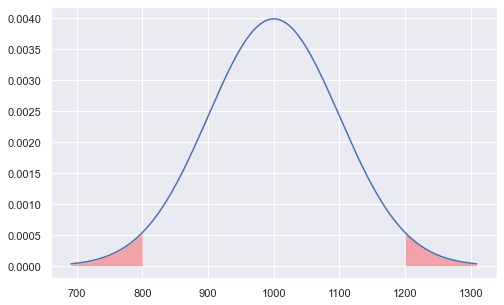

In [17]:
n = 2

# highlight the tails of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
mask_l = x < mu - n*sigma
mask_u = x > mu + n*sigma
ax.fill_between(x[mask_l], y1=y[mask_l], alpha=0.3, facecolor='red')
ax.fill_between(x[mask_u], y1=y[mask_u], alpha=0.3, facecolor='red')

# calculate the probability of Pr{x < 𝜇-n𝜎  OR  x > 𝜇+n𝜎}
tail_prob = (sum(y[mask_l]) + sum(y[mask_u]) )/sum(y)

print("Probability of observing value x <",
      round(mu-n*sigma,2), "or x >", round(mu+n*sigma,2),
      "is", round(tail_prob,4))

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $n=2$ standard deviations away from the mean (more precisely, we should use $n = 1.96$ to get exactly 5%).

We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.

## Random samples of size $n$

Consider a random variable $X$ with a known probability distribution $p_X$.
What can we say about the characteristics of $n$ copies of the random variable
$$ \large
  \mathbf{X} = X_1X_2X_3\cdots X_n,
$$
where each $X_i$ is independent copy of the random variable $X$.
Note we use capital letters because each $X_i$ is a random variable (particular values are denoted with lowercase $x_i$).

The probability models for random samples are an important building block for statistics.

### Statistics of random samples

Statistics are function computed from samples. We can compute statistics of random samples:

- Examples of sample statistics:
  - sample mean $\overline{X} = \frac{1}{n}\sum_{i=1}^n X_i$
  - sample variance $S^2 = \frac{1}{n-1}\sum_{i=1}^n \left(X_i-\overline{X}\right
)^2$
- Note that $\overline{X}$ and $S^2$ are random variables,
  since they are computed from a random sample.
- NEW CONCEPT: **sampling distribution** of a statistic describes the distribution of a statistic for a random sample.

### Sample mean

$$\large
  \overline{X} = \frac{1}{n}\sum_{i=1}^n X_i = \texttt{mean(} \mathbf{X} \texttt{)}
$$


In [18]:
def mean(values):
    """
    Compute the arithmetic mean of the `values` list.
    """
    return sum(values)/len(values)

mean([3,3,6])

4.0

### Sampling distribution of a statistic

Consider any function `statfunc` computed based on a sample of size $n$.
For example, the sample mean function `mean` defined above.
Functions computed from samples are called *statistics* and you're already familiar with several of these functions (mean, variance, standard deviation).
For now we'll keep calling them functions to make the connection with math concept of a function cleared, and also to facilitate the hands-on calculations using Python functions.

For any given sample $\mathbf{X}$, the output of the function `statfunc` is a random variable. This should make sense intuitively: if the inputs to the function $\mathbf{X}$ are random, then the outputs are also random.

The probability distribution of the random variable `statfunc`($\mathbf{X}$) is called the **sampling distribution** of the function `statfunc`.

In [19]:
def get_sampling_dist(rv, statfunc, n, N=1000):
    """
    Approximate the sampling distribution of the statistic `statfunc`
    for random samples of size `n` from the random variable `rv`.
    Draw `N` random samples and calculate `statfunc(sample)` for each.
    """
    sampling_dist = []
    for i in range(0, N):
        sample = rv.rvs(n)
        value = statfunc(sample)
        sampling_dist.append(value)
    return sampling_dist


### Example 1: Samples from a uniform distribution


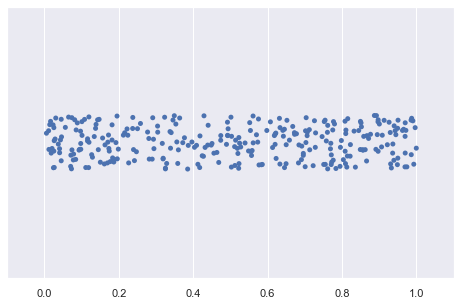

In [20]:
from scipy.stats import uniform

# define a uniform random variable
rv1 = uniform(0, 1)
mu1 = rv1.mean()    # 𝜇1 (mu)
sigma1 = rv1.std()  # 𝜎1 (sigma)

# plot data from 30 samples of size 10
N = 30
n = 10
plt.xlim(-0.1, 1.1)
for i in range(0, N):
    sample1 = rv1.rvs(n)
    sns.stripplot(sample1)

#### Sampling distribution of the mean

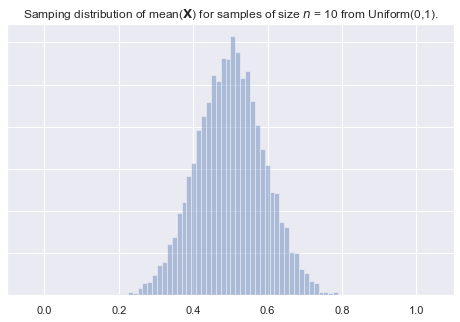

In [21]:
# compute the sampling distribution for samples of size n
mean_sdist_data1 = get_sampling_dist(rv1, mean, n, N=10000)

# plot a histogram of the sampling distribution
plt.xlim(-0.1, 1.1)
ax = sns.distplot(mean_sdist_data1, kde=False)
ax.set(yticklabels=[])
_ = ax.set_title("Samping distribution of mean($\mathbf{X}$) for samples "
                 "of size $n$ = " + str(n) + ' from Uniform(0,1).')

In [22]:
xbar_mu = np.mean(mean_sdist_data1)
xbar_std = np.std(mean_sdist_data1, ddof=1)
print("The sampling distribution has mean", round(xbar_mu,2),
      "\nand the standard error is", round(xbar_std,5))

The sampling distribution has mean 0.5 
and the standard error is 0.09085


In [23]:
# CLT prediction about standard error: 
sigma1/np.sqrt(n)

0.09128709291752768

### Example 2: Samples from a normal distribution

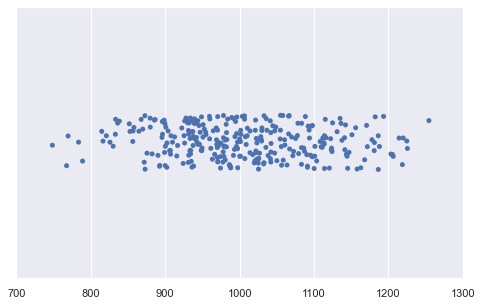

In [24]:
from scipy.stats import uniform

# define a normal random variable
mu2 = 1000         # 𝜇2 (mu)
sigma2 = 100       # 𝜎2 (sigma)
rv2 = norm(mu2, sigma2)

# plot data from 30 samples of size 10
N = 30
n = 10
plt.xlim(700,1300)
for i in range(0, N):
    sample2 = rv2.rvs(n)
    sns.stripplot(sample2)

#### Sampling distribution of the mean

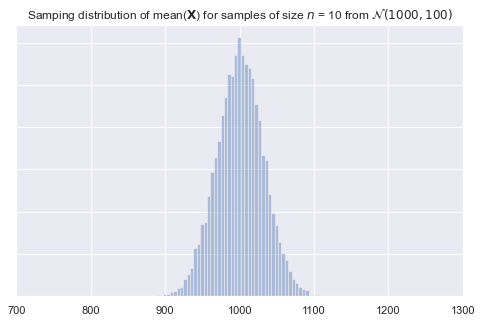

In [25]:
# compute the sampling distribution for samples of size n
mean_sdist_data2 = get_sampling_dist(rv2, mean, n, N=10000)

# plot a histogram of the sampling distribution
ax = sns.distplot(mean_sdist_data2, kde=False)
ax.set(yticklabels=[])
plt.xlim(700,1300)
_ = ax.set_title("Samping distribution of mean($\mathbf{X}$) for samples of size "
                 "$n$ = " + str(n) + ' from $\mathcal{N}('+ str(mu2) + ',' + str(sigma2) + ')$')

In [26]:
xbar_mu = np.mean(mean_sdist_data2)
xbar_std = np.std(mean_sdist_data2, ddof=1)
print("The sampling distribution has mean", round(xbar_mu,2),
      "\nand the standard error is", round(xbar_std,2))

The sampling distribution has mean 1000.23 
and the standard error is 31.48


In [27]:
# CLT prediction about standard error:
sigma2/np.sqrt(n)

31.622776601683793

### Central limit theorem

The *Central Limit Theorem* (CLT) is a mathy result tells us two very important practical facts:

1. The sampling distribution of the sample mean $\overline{X}$ is normally distributed for samples taken for ANY random variable, as the sample size $n$ increases.
2. The standard deviation of sampling distribution of the sample mean $\overline{X}$ is given
   by the formula $\texttt{se}=\frac{\sigma}{\sqrt{n}}$,
   where $\sigma$ is the standard deviation of each copy of the random variable $X$.
   The standard deviation of $\overline{X}$ is called the **standard error** (`se`) of the mean.

Let's verify both claims of the CLT by revisiting the sampling distributions we obtained above.


### Discussion
CLT is the reason why statistics works. We can use properties of sample to estimate the parameters of the population, and our estimates get more and more accurate as the samples get larger.

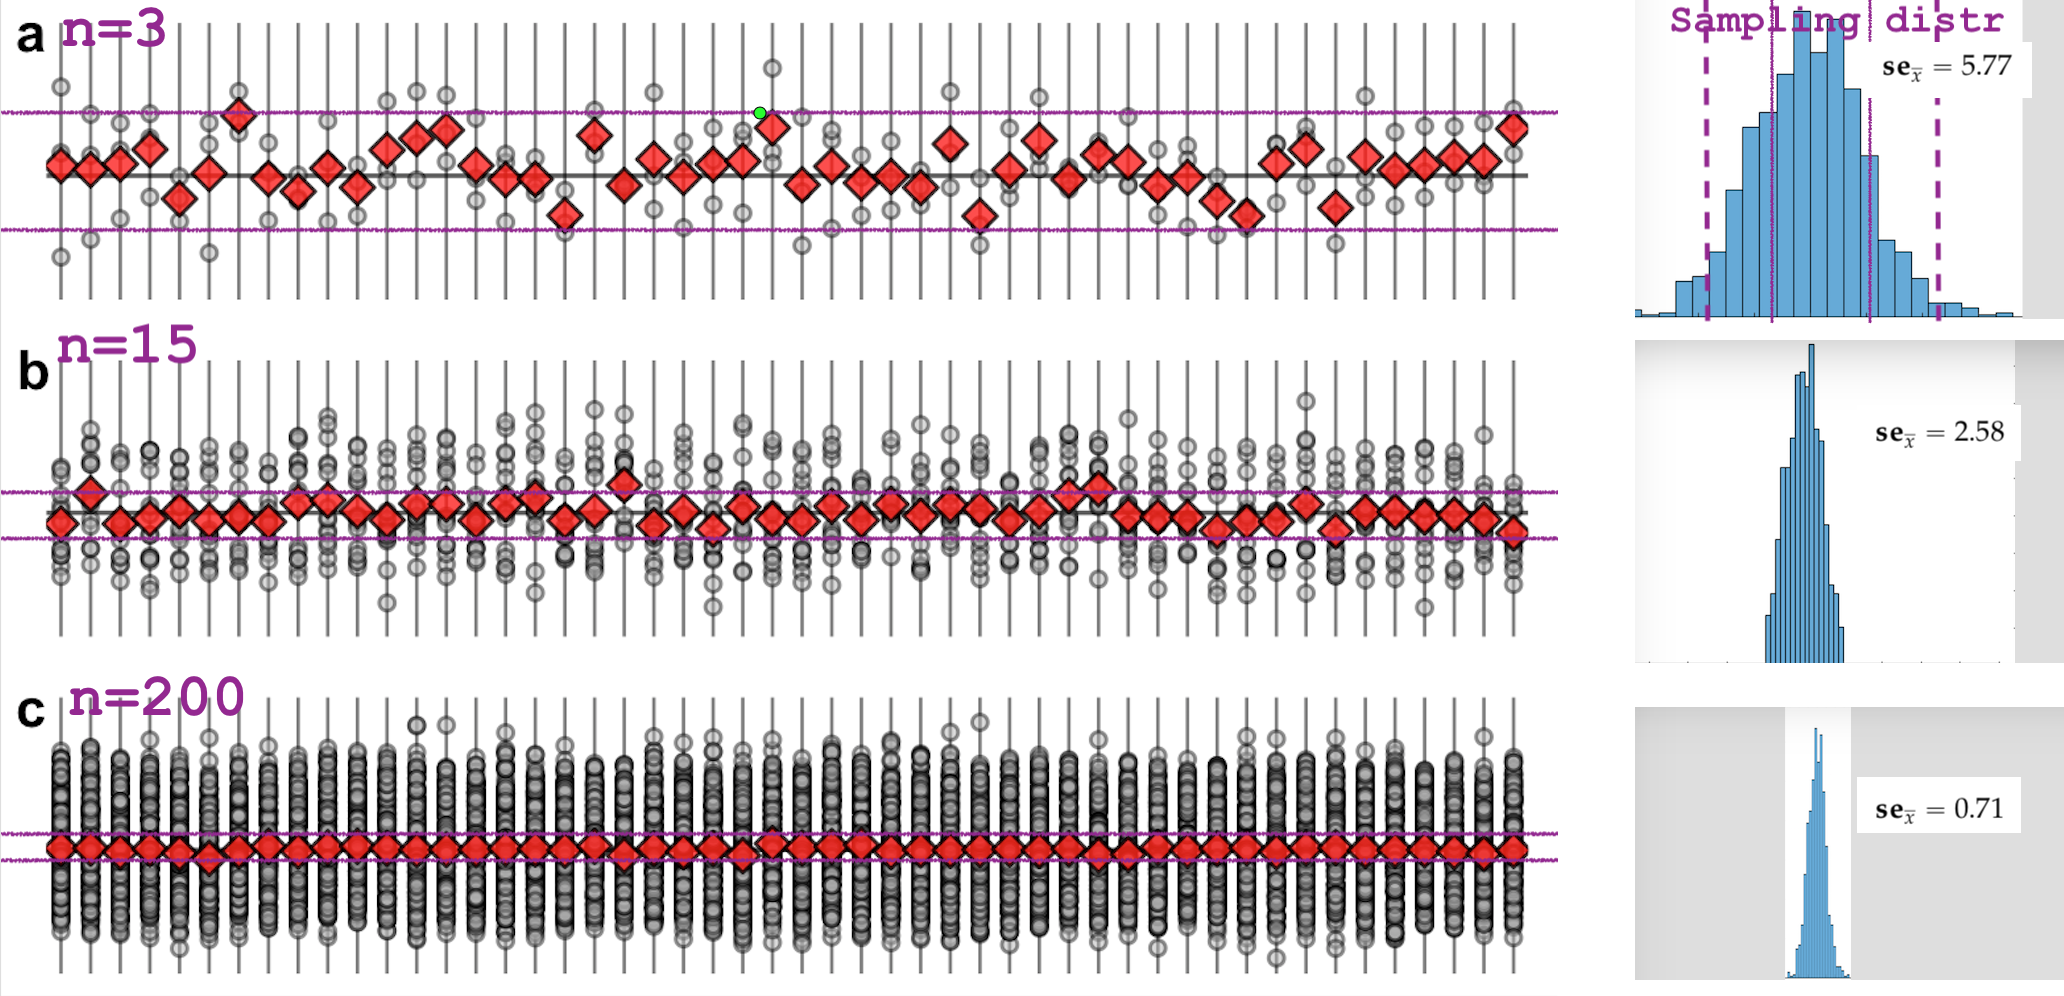

## Lead out

We learned about probability models and the properties of statistics computed from random samples. In the next notebook, we'll use probability tools for statistical analysis.

Go to the next notebook, [03_STATS.ipynb](./03_STATS.ipynb), to learn about statistical inference techniques.